In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
data=pd.read_csv("F:\\datacode\\loan_data.csv")

In [3]:
data.shape

(1413701, 158)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [5]:
for col in data.columns:
    print(col)


SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE_x
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
NAME_TYPE_SUITE_x
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START_x
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVING

In [6]:

# # Set options to display all columns and rows
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.max_rows', None)   

In [7]:
data.isnull().mean()*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               39.690571
DAYS_LAST_DUE_1ST_VERSION    39.690571
DAYS_LAST_DUE                39.690571
DAYS_TERMINATION             39.690571
NFLAG_INSURED_ON_APPROVAL    39.690571
Length: 158, dtype: float64

In [8]:
#dropping columns which are 45% above null values

threshold =len(data)*0.55
data=data.dropna(thresh=threshold,axis=1)

In [9]:
data.isnull().mean()*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               39.690571
DAYS_LAST_DUE_1ST_VERSION    39.690571
DAYS_LAST_DUE                39.690571
DAYS_TERMINATION             39.690571
NFLAG_INSURED_ON_APPROVAL    39.690571
Length: 104, dtype: float64

In [10]:
data.shape

(1413701, 104)

In [11]:
data["TARGET"].value_counts()

TARGET
0    1291341
1     122360
Name: count, dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data["OCCUPATION_TYPE"].fillna("Unknown",inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12572\2415324612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["OCCUPATION_TYPE"].fillna("Unknown",inplace=True)


In [14]:
#data["OCCUPATION_TYPE"].fillna(data["OCCUPATION_TYPE"].mode()[0],inplace=True)

In [15]:
#Scatter plot for ext sources

# plt.figure(figsize=(15,5))
# sns.scatterplot(data=data,x="EXT_SOURCE_2",y="EXT_SOURCE_3")
# plt.show()

In [16]:
#data.select_dtypes(include=["int64","float64"]).columns

In [17]:
# data[["AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON"
#            ,"AMT_REQ_CREDIT_BUREAU_QRT"]]

In [18]:
#countplot

# plt.figure(figsize=(15,5))
# sns.countplot(data=amt,x="AMT_INCOME_TOTAL",y="AMT_CREDIT_x	A")


<Axes: xlabel='count', ylabel='OCCUPATION_TYPE'>

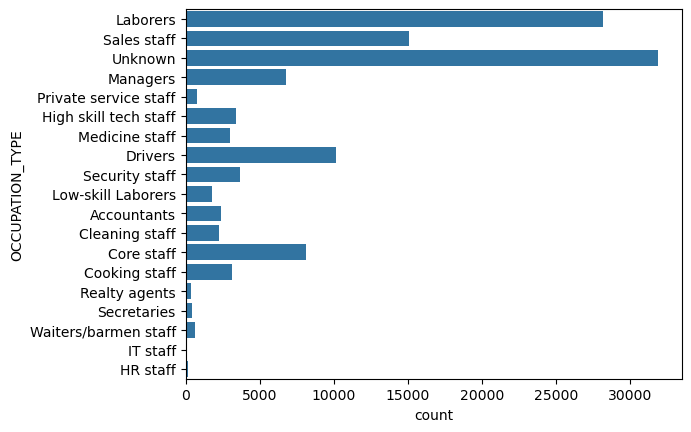

In [19]:
sns.countplot(data[data["TARGET"]==1]["OCCUPATION_TYPE"])

In [20]:
#sparsity

# sp=[]
# for i in data.columns:
#   zero=(data[i]==0).sum()
#   sp.append(zero)

In [21]:
# pd.DataFrame({
#     "columns":data.columns,
#     "sparsity":sp
# })

In [22]:
#Seperating numerical and categorical columns
numerical_col=data.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_col=data.select_dtypes(include=["object"]).columns.tolist()

In [23]:
data[numerical_col].isnull().mean()*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT_x                  0.000000
                               ...    
DAYS_FIRST_DUE               39.690571
DAYS_LAST_DUE_1ST_VERSION    39.690571
DAYS_LAST_DUE                39.690571
DAYS_TERMINATION             39.690571
NFLAG_INSURED_ON_APPROVAL    39.690571
Length: 77, dtype: float64

In [24]:
data["EXT_SOURCE_3"].mean()

0.4896986356017283

In [25]:
data["EXT_SOURCE_3"].median()

0.5100895276257282

In [26]:
data["DAYS_LAST_DUE"].median()

-534.0

In [27]:
# AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT

In [28]:
data["AMT_REQ_CREDIT_BUREAU_QRT"].median()

0.0

In [29]:
data["AMT_REQ_CREDIT_BUREAU_MON"].median()

0.0

In [30]:
data["AMT_REQ_CREDIT_BUREAU_YEAR"].median()

3.0

In [31]:
# Median imputation for numerical columns
for col in numerical_col:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12572\2069105703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [32]:
data[categorical_col].isnull().mean()*100

NAME_CONTRACT_TYPE_x            0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
NAME_TYPE_SUITE_x               0.249416
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
OCCUPATION_TYPE                 0.000000
WEEKDAY_APPR_PROCESS_START_x    0.000000
ORGANIZATION_TYPE               0.000000
NAME_CONTRACT_TYPE_y            0.000000
WEEKDAY_APPR_PROCESS_START_y    0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
NAME_SELLER_INDU

In [33]:
# Dropping nan which are less than 1% 
data.dropna(axis=1,inplace=True)

In [34]:
data.isnull().sum()

SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE_x         0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                            ..
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
NFLAG_INSURED_ON_APPROVAL    0
Length: 102, dtype: int64

In [35]:
data.drop(["SK_ID_CURR","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE",               
"REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL",
"FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","REGION_RATING_CLIENT",            
"REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START_x","HOUR_APPR_PROCESS_START_x",       
"REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",     
"REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE","OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE",
"FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6",                
"FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",              
"FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18",               
"FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","SK_ID_PREV","NAME_CONTRACT_TYPE_y",
"AMT_ANNUITY_y","AMT_APPLICATION","AMT_GOODS_PRICE_y","WEEKDAY_APPR_PROCESS_START_y","HOUR_APPR_PROCESS_START_y",
"FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_CONTRACT_STATUS","DAYS_DECISION","NAME_PAYMENT_TYPE",
"CODE_REJECT_REASON","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE",
"SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","CNT_PAYMENT","NAME_YIELD_GROUP","DAYS_FIRST_DRAWING",
"DAYS_LAST_DUE_1ST_VERSION","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"],axis=1,inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TARGET                     1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE_x       1413701 non-null  object 
 2   CODE_GENDER                1413701 non-null  object 
 3   FLAG_OWN_CAR               1413701 non-null  object 
 4   FLAG_OWN_REALTY            1413701 non-null  object 
 5   CNT_CHILDREN               1413701 non-null  int64  
 6   AMT_INCOME_TOTAL           1413701 non-null  float64
 7   AMT_CREDIT_x               1413701 non-null  float64
 8   AMT_ANNUITY_x              1413701 non-null  float64
 9   AMT_GOODS_PRICE_x          1413701 non-null  float64
 10  NAME_INCOME_TYPE           1413701 non-null  object 
 11  DAYS_EMPLOYED              1413701 non-null  int64  
 12  FLAG_EMP_PHONE             1413701 non-null  int64  
 13  FLAG_EMAIL  

In [37]:
data.shape

(1413701, 24)

In [38]:
data.duplicated().sum()

166820

In [39]:
data.drop_duplicates(inplace=True)

In [40]:
data.duplicated().sum()

0

In [41]:
data.shape

(1246881, 24)

In [42]:
#saving the cleaned file
output_path ="data_cleaned.csv"
data.to_csv(output_path, index=False)

# DATA VISUALIZATION

In [44]:
input_path ="data_cleaned.csv"
data=pd.read_csv(input_path)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246881 entries, 0 to 1246880
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TARGET                     1246881 non-null  int64  
 1   NAME_CONTRACT_TYPE_x       1246881 non-null  object 
 2   CODE_GENDER                1246881 non-null  object 
 3   FLAG_OWN_CAR               1246881 non-null  object 
 4   FLAG_OWN_REALTY            1246881 non-null  object 
 5   CNT_CHILDREN               1246881 non-null  int64  
 6   AMT_INCOME_TOTAL           1246881 non-null  float64
 7   AMT_CREDIT_x               1246881 non-null  float64
 8   AMT_ANNUITY_x              1246881 non-null  float64
 9   AMT_GOODS_PRICE_x          1246881 non-null  float64
 10  NAME_INCOME_TYPE           1246881 non-null  object 
 11  DAYS_EMPLOYED              1246881 non-null  int64  
 12  FLAG_EMP_PHONE             1246881 non-null  int64  
 13  FLAG_EMAIL  

In [46]:
# #plot for gender distribution
# gender_count = data["CODE_GENDER"].value_counts().reset_index()
# gender_count.columns =["CODE_GENDER","count"]
# colors=["#ffe5ff","#00c89b"]
# fig= px.bar(gender_count,x="CODE_GENDER",y="count",title="Gender Count",
#            color="CODE_GENDER",color_discrete_sequence=color)
# fig.show()

In [47]:
# def plot(col):
#     df= data[col].value_counts().reset_index()
#     df.columns=[col,"count"]
#     colors=["#ffe5ff","#00c89b"]
#     fig=px.bar(df,x=col,y="count",title=f"Distribution of {col}",
#                color=col,color_discrete_sequence=colors
#               )
#     fig.show()

In [275]:
def plot(col):
    plt.figure(figsize=(8,5))
    plt.xticks(rotation=90)
    df= data[col].value_counts().reset_index()
    print(df.head)
    df.columns=[col,"count"]
    sns.color_palette(palette='PiYG')
    sns.barplot(df,x=col,y="count",palette='PiYG')
    plt.title(f"Distribution of {col}")
    plt.show()

In [119]:
cat_col= data.select_dtypes(include="object").columns

<bound method NDFrame.head of   NAME_CONTRACT_TYPE_x    count
0           Cash loans  1151155
1      Revolving loans    95726>


C:\Users\admin\AppData\Local\Temp\ipykernel_12572\1764211247.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




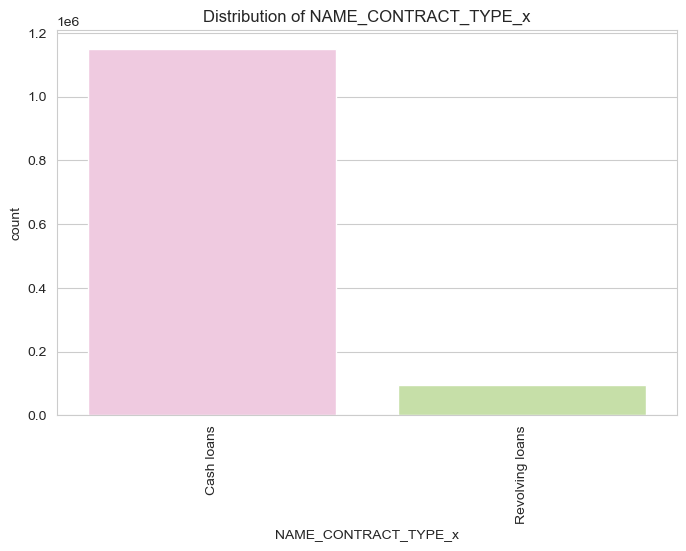

<bound method NDFrame.head of   CODE_GENDER   count
0           F  839436
1           M  407398
2         XNA      47>


C:\Users\admin\AppData\Local\Temp\ipykernel_12572\1764211247.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




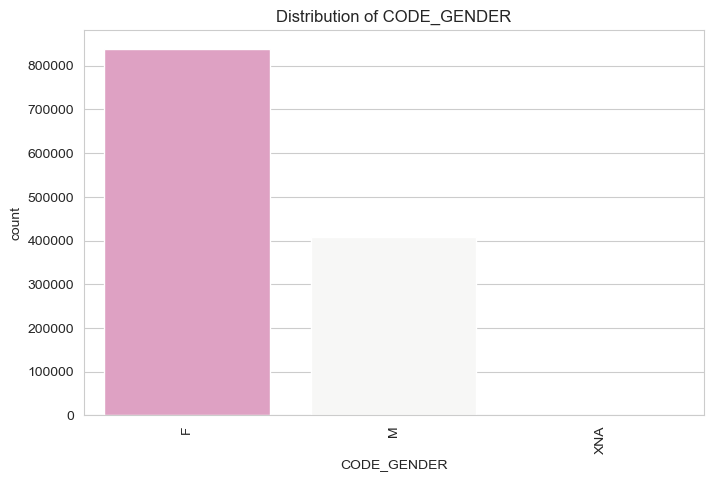

<bound method NDFrame.head of   FLAG_OWN_CAR   count
0            N  821458
1            Y  425423>


C:\Users\admin\AppData\Local\Temp\ipykernel_12572\1764211247.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




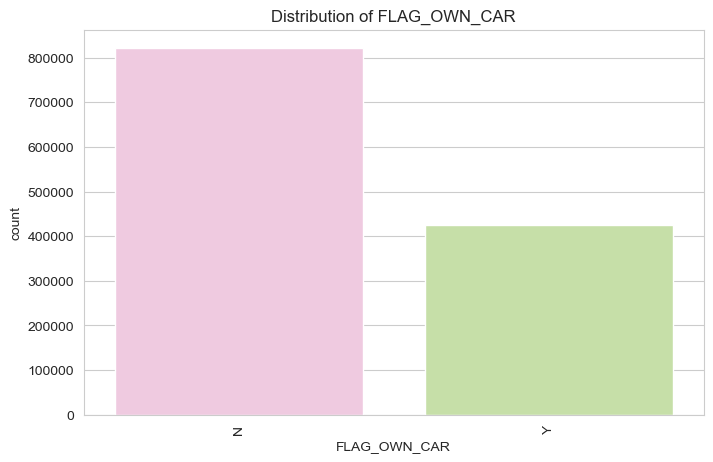

<bound method NDFrame.head of   FLAG_OWN_REALTY   count
0               Y  897805
1               N  349076>


C:\Users\admin\AppData\Local\Temp\ipykernel_12572\1764211247.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




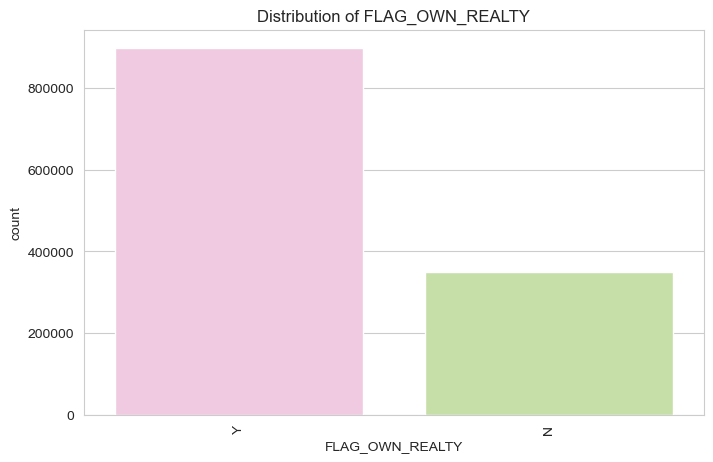

<bound method NDFrame.head of        NAME_INCOME_TYPE   count
0               Working  643512
1  Commercial associate  283155
2             Pensioner  235411
3         State servant   84649
4            Unemployed     116
5               Student      23
6       Maternity leave      15>


C:\Users\admin\AppData\Local\Temp\ipykernel_12572\1764211247.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




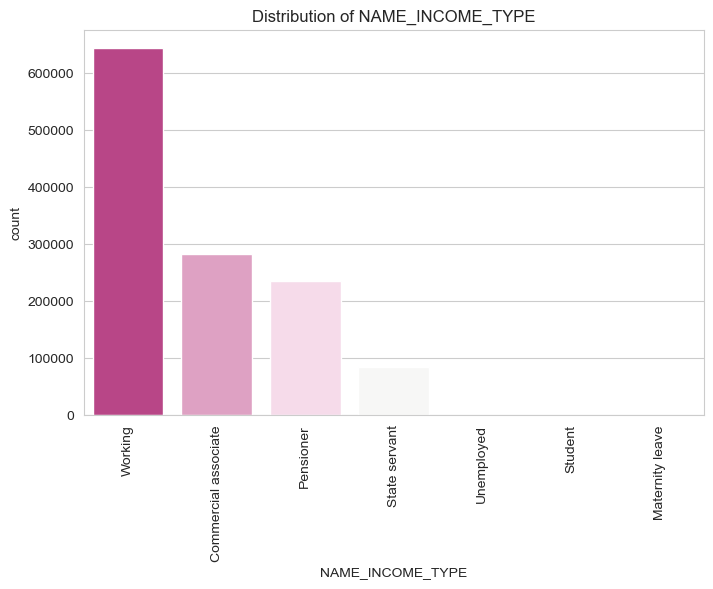

<bound method NDFrame.head of           OCCUPATION_TYPE   count
0                 Unknown  398465
1                Laborers  223915
2             Sales staff  133278
3              Core staff  105443
4                Managers   83962
5                 Drivers   74671
6   High skill tech staff   43364
7             Accountants   37308
8          Medicine staff   35537
9          Security staff   28023
10          Cooking staff   25489
11         Cleaning staff   21204
12  Private service staff   10721
13     Low-skill Laborers    8252
14   Waiters/barmen staff    5445
15            Secretaries    5099
16          Realty agents    3100
17               HR staff    2029
18               IT staff    1576>


C:\Users\admin\AppData\Local\Temp\ipykernel_12572\1764211247.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




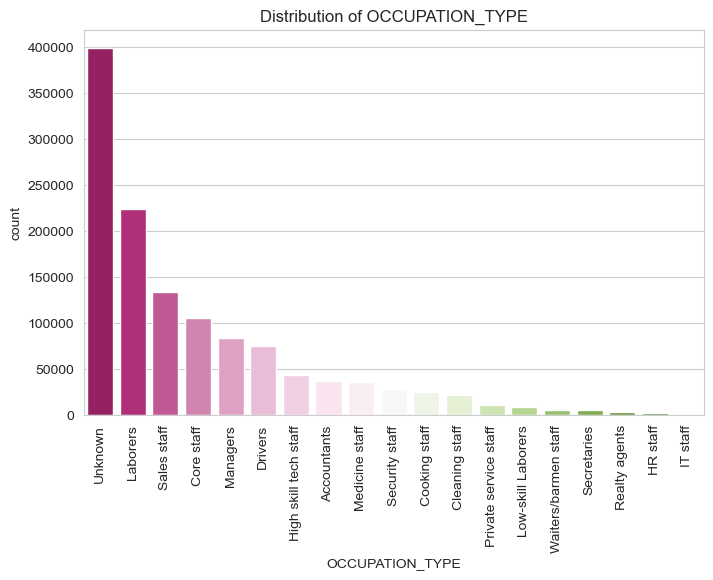

<bound method NDFrame.head of               NAME_CASH_LOAN_PURPOSE   count
0                                XAP  763540
1                                XNA  425918
2                            Repairs   19347
3                              Other   13041
4                       Urgent needs    7006
5                  Buying a used car    2353
6       Building a house or an annex    2250
7                  Everyday expenses    2014
8                           Medicine    1832
9            Payments on other loans    1520
10                         Education    1297
11                           Journey    1018
12  Purchase of electronic equipment     915
13                  Buying a new car     833
14          Wedding / gift / holiday     784
15                       Car repairs     680
16                     Buying a home     668
17                         Furniture     639
18      Buying a holiday home / land     446
19              Business development     349
20       Gasification / w

C:\Users\admin\AppData\Local\Temp\ipykernel_12572\1764211247.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




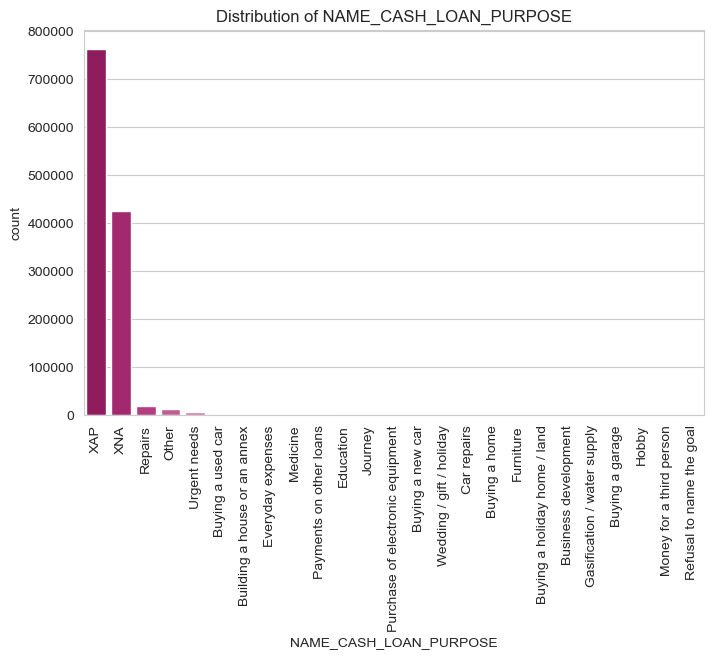

In [277]:
for i in cat_col:
    plot(i)

In [197]:
#line for ext source

# plt.figure(figsize=(8,5))
# #sns.lineplot(data=data.head(5000),x="EXT_SOURCE_2",y="EXT_SOURCE_3")
# sns.lineplot(data=data.head(50000),x=data.head(50000).index,y="EXT_SOURCE_2")
# sns.lineplot(data=data.head(50000),x=data.head(50000).index,y="EXT_SOURCE_3")
# plt.show()

In [269]:
# data['AMT_INCOME_TOTAL_BINS'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=[0, 100000, 200000, 300000, 400000, 500000])
# sns.countplot(x='AMT_INCOME_TOTAL_BINS', hue='CODE_GENDER', data=data)
# plt.show()


In [271]:
#data[["CODE_GENDER","AMT_INCOME_TOTAL"]].groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].value_counts().reset_index()

In [247]:
df_1=data[["CODE_GENDER","AMT_INCOME_TOTAL","TARGET"]].groupby("CODE_GENDER")["TARGET"].value_counts().reset_index()

In [249]:
df_1

,CODE_GENDER,TARGET,count
0,F,0,777330
1,F,1,62106
2,M,0,364514
3,M,1,42884
4,XNA,0,47


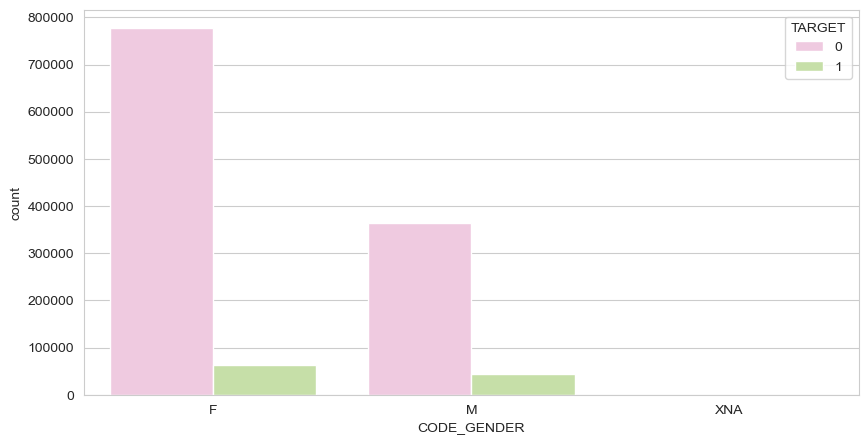

In [273]:
plt.figure(figsize=(10,5))
sns.color_palette(palette='PiYG')
sns.barplot(data=df_1,x="CODE_GENDER",y="count",hue="TARGET",palette='PiYG')
plt.show()

In [279]:
data[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]].groupby("TARGET").value_counts().reset_index()



,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,count
0,0,0.285898,0.510090,427
1,0,0.562768,0.510090,380
2,0,0.262258,0.510090,337
3,0,0.265256,0.510090,312
4,0,0.159679,0.510090,311
...,...,...,...,...
277621,1,0.795047,0.277886,1
277622,1,0.796465,0.510090,1
277623,1,0.797612,0.306202,1
277624,1,0.800868,0.355639,1


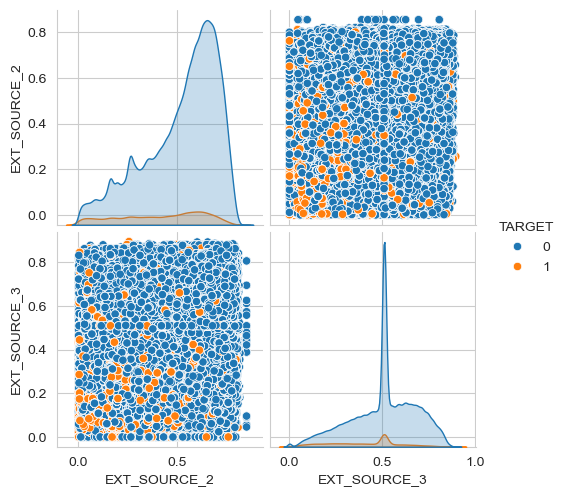

In [281]:
sns.pairplot(data[['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], hue='TARGET')
plt.show()


In [283]:
correlation = data[["EXT_SOURCE_2","EXT_SOURCE_3"]].corr()
print(correlation)

              EXT_SOURCE_2  EXT_SOURCE_3
EXT_SOURCE_2      1.000000      0.093696
EXT_SOURCE_3      0.093696      1.000000


In [287]:
data["AMT_GOODS_PRICE_x"].value_counts()

AMT_GOODS_PRICE_x
225000.0     101795
450000.0     100553
675000.0      89752
900000.0      56965
270000.0      41577
              ...  
2052000.0         1
872739.0          1
4050000.0         1
657625.5          1
594558.0          1
Name: count, Length: 986, dtype: int64

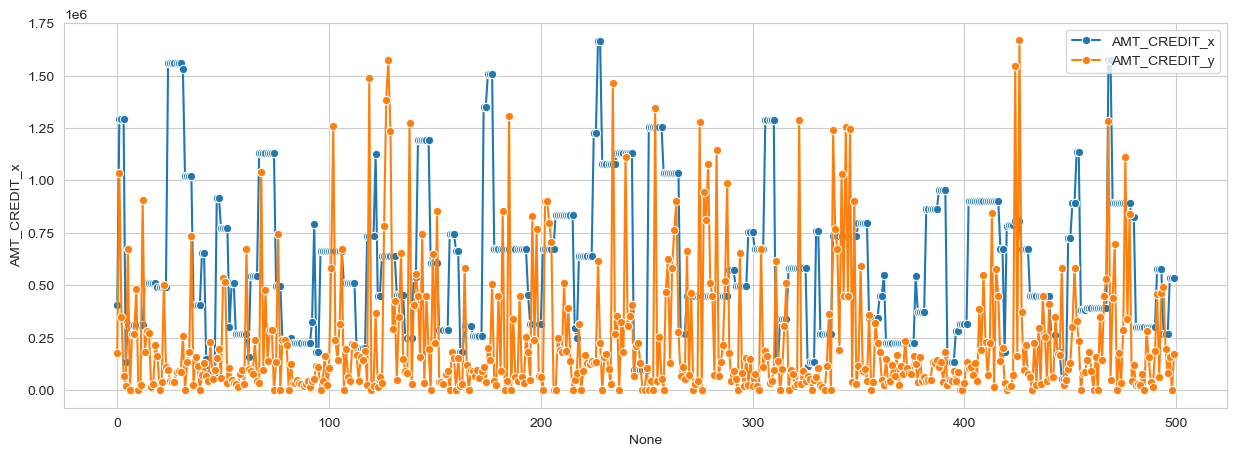

In [311]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data.head(500),x=data.head(500).index,y="AMT_CREDIT_x",marker="o",label="AMT_CREDIT_x")
sns.lineplot(data=data.head(500),x=data.head(500).index,y="AMT_CREDIT_y",marker="o",label="AMT_CREDIT_y")
plt.show()

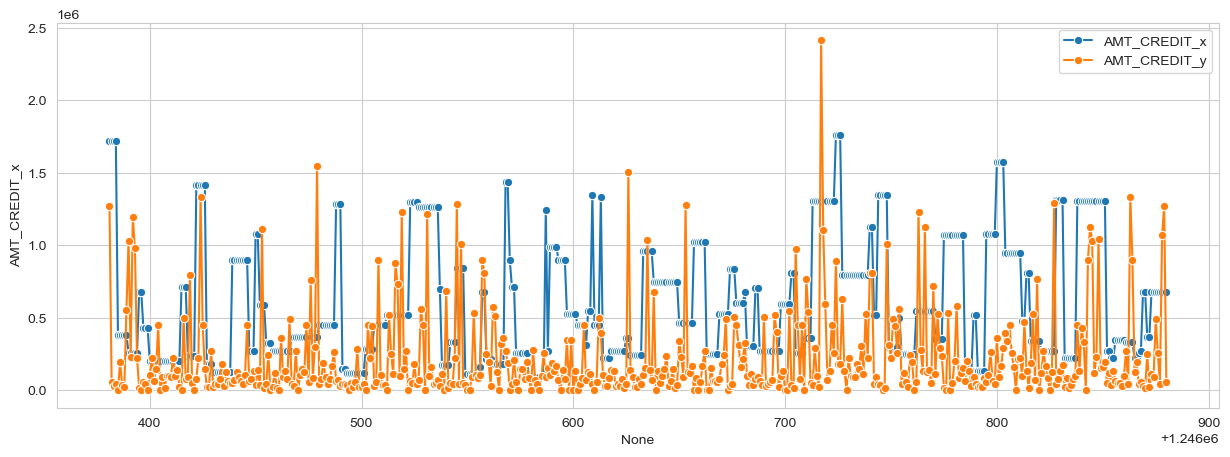

In [313]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data.tail(500),x=data.tail(500).index,y="AMT_CREDIT_x",marker="o",label="AMT_CREDIT_x")
sns.lineplot(data=data.tail(500),x=data.tail(500).index,y="AMT_CREDIT_y",marker="o",label="AMT_CREDIT_y")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12572\2814403665.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




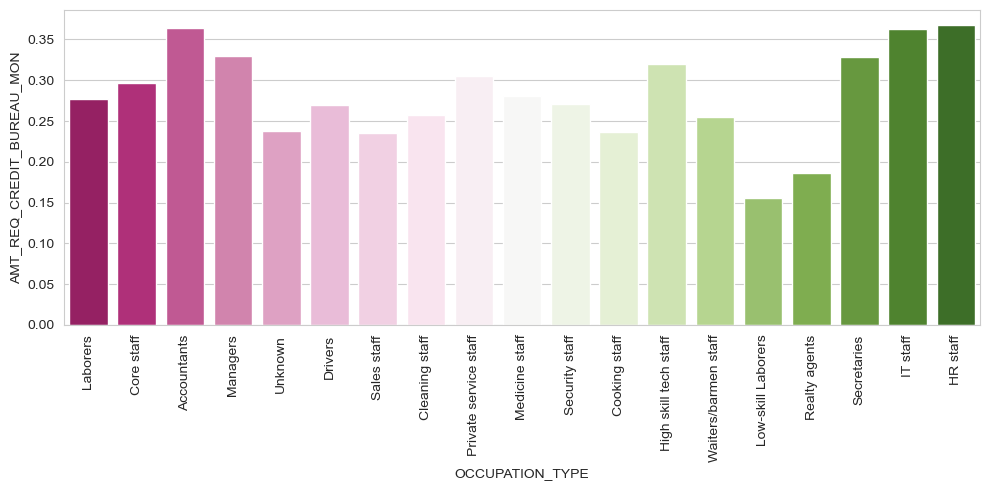

In [379]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, ha='center')
sns.color_palette(palette='PiYG')
sns.barplot(data=data,x="OCCUPATION_TYPE",y="AMT_REQ_CREDIT_BUREAU_MON",palette='PiYG',errorbar=None)
plt.tight_layout()
plt.show()

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246881 entries, 0 to 1246880
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   TARGET                     1246881 non-null  int64   
 1   NAME_CONTRACT_TYPE_x       1246881 non-null  object  
 2   CODE_GENDER                1246881 non-null  object  
 3   FLAG_OWN_CAR               1246881 non-null  object  
 4   FLAG_OWN_REALTY            1246881 non-null  object  
 5   CNT_CHILDREN               1246881 non-null  int64   
 6   AMT_INCOME_TOTAL           1246881 non-null  float64 
 7   AMT_CREDIT_x               1246881 non-null  float64 
 8   AMT_ANNUITY_x              1246881 non-null  float64 
 9   AMT_GOODS_PRICE_x          1246881 non-null  float64 
 10  NAME_INCOME_TYPE           1246881 non-null  object  
 11  DAYS_EMPLOYED              1246881 non-null  int64   
 12  FLAG_EMP_PHONE             1246881 non-null  int64   
 1

In [345]:
# data[["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_ANNUITY_x","AMT_GOODS_PRICE_x",
#        "NAME_INCOME_TYPE","FLAG_DOCUMENT_2"]].groupby("FLAG_DOCUMENT_2").value_counts().reset_index()

In [409]:
data["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working                 643512
Commercial associate    283155
Pensioner               235411
State servant            84649
Unemployed                 116
Student                     23
Maternity leave             15
Name: count, dtype: int64

In [353]:
df_2=data[["NAME_INCOME_TYPE","OCCUPATION_TYPE","CODE_GENDER"]].groupby("CODE_GENDER").value_counts().reset_index(name="Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '(F, Accountants)'),
  Text(1, 0, '(F, Cleaning staff)'),
  Text(2, 0, '(F, Cooking staff)'),
  Text(3, 0, '(F, Core staff)'),
  Text(4, 0, '(F, Drivers)'),
  Text(5, 0, '(F, HR staff)'),
  Text(6, 0, '(F, High skill tech staff)'),
  Text(7, 0, '(F, IT staff)'),
  Text(8, 0, '(F, Laborers)'),
  Text(9, 0, '(F, Low-skill Laborers)'),
  Text(10, 0, '(F, Managers)'),
  Text(11, 0, '(F, Medicine staff)'),
  Text(12, 0, '(F, Private service staff)'),
  Text(13, 0, '(F, Realty agents)'),
  Text(14, 0, '(F, Sales staff)'),
  Text(15, 0, '(F, Secretaries)'),
  Text(16, 0, '(F, Security staff)'),
  Text(17, 0, '(F, Unknown)'),
  Text(18, 0, '(F, Waiters/barmen staff)'),
  Text(19, 0, '(M, Accountants)'),
  Text(20, 0, '(M, Cleaning staff)'),
  Text(21, 0, '(M, Cooking staff)'),
  Text(22, 0, '(M

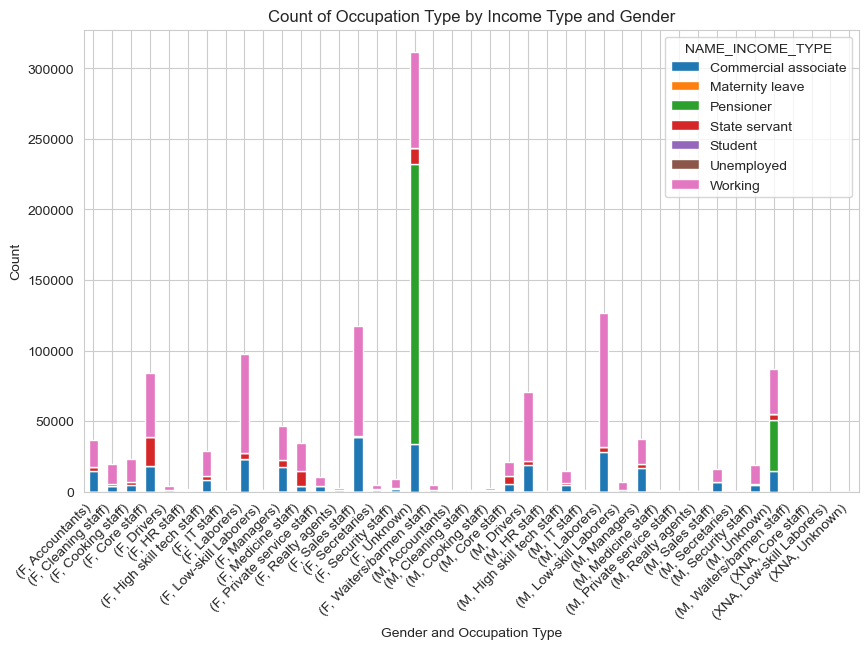

In [407]:
# Create a pivot table for easier plotting
pivot_df = df_2.pivot_table(index=["CODE_GENDER","OCCUPATION_TYPE"], 
                              columns="NAME_INCOME_TYPE", 
                              values="Count", 
                              aggfunc="sum", fill_value=0)

# Plotting a stacked bar plot using matplotlib
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Count of Occupation Type by Income Type and Gender')
plt.xlabel('Gender and Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')


In [365]:
df_2

,CODE_GENDER,NAME_INCOME_TYPE,OCCUPATION_TYPE,Count
0,F,Pensioner,Unknown,199096
1,F,Working,Sales staff,77455
2,F,Working,Laborers,70352
3,F,Working,Unknown,68447
4,F,Working,Core staff,45014
...,...,...,...,...
130,M,State servant,Realty agents,2
131,XNA,Commercial associate,Unknown,18
132,XNA,Working,Low-skill Laborers,15
133,XNA,Working,Core staff,11


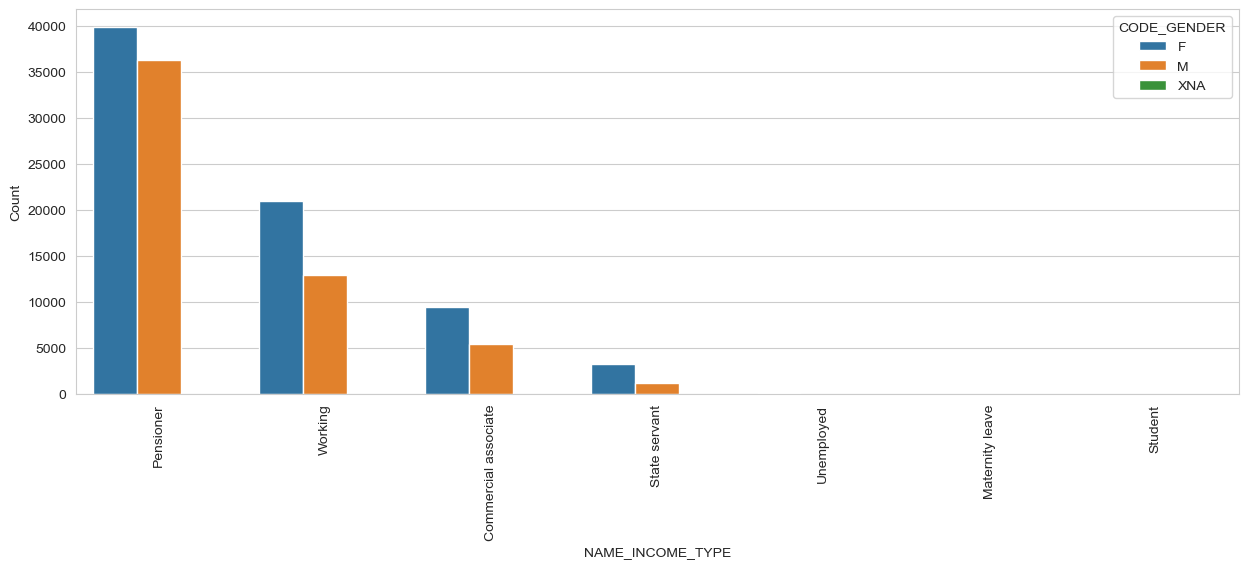

In [377]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=df_2,x="NAME_INCOME_TYPE",y="Count",hue="CODE_GENDER",errorbar=None)
plt.show()

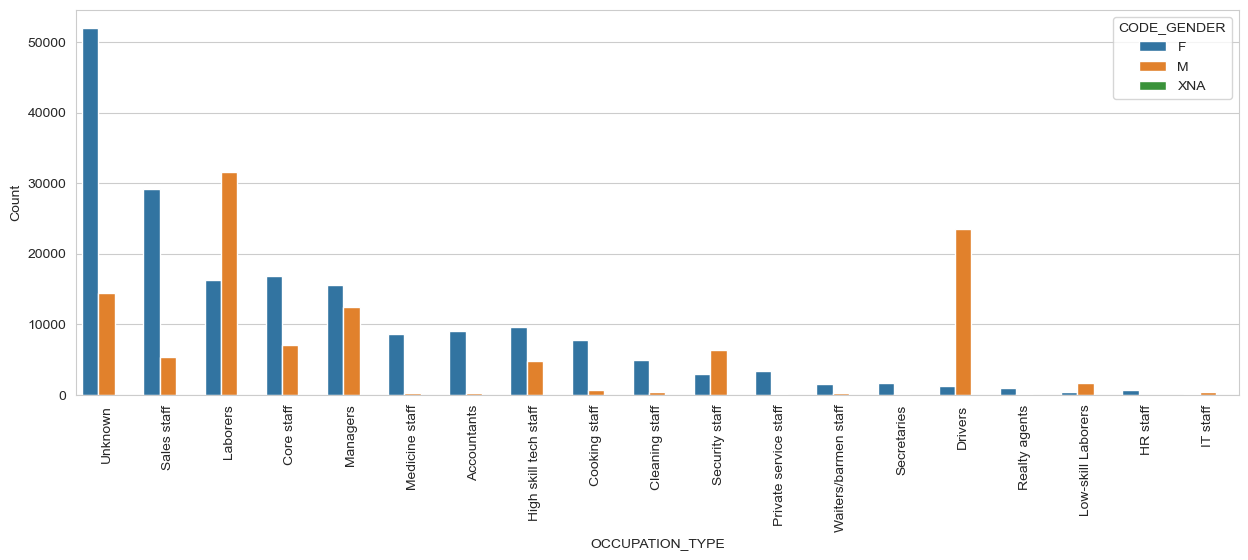

In [391]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=df_2,x="OCCUPATION_TYPE",y="Count",hue="CODE_GENDER",errorbar=None)
plt.show()

In [385]:
#df_3=data[["NAME_INCOME_TYPE","OCCUPATION_TYPE"]].groupby("NAME_INCOME_TYPE").value_counts().reset_index()